# Computational Physics Fall 2022 
# HomeWork #1 

## Please fill in the student information
Student name: Ismail Olumegbon    <br>
Student e-mail: ismailo1@umbc.edu  <br>
Student ID: CX69336 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time 
from numpy import random
import importlib
netcdf = importlib.util.find_spec("netCDF4")
if netcdf is not None:
  import netCDF4
else:
  !pip install netCDF4

## Problem 1 (20%) - sort an array</a>

### Write a simple code to sort an array to an ascending order, i.e., from small to large, and compare with the numpy sort routine.
### you need to compare two things. 1) the sorted results is correct 2) how much time does you code take to finish and how long does the Numpy rotuine to finish.

In [ ]:
#Sort the array in ascending order    
def sort_an_array(input_array):
    # input_array: the input array
    b = 0
    for i in range(0,len(input_array)):
        for j in range(i+1, len(input_array)):
            if input_array[i] > input_array[j]:
                b = input_array[i]
                input_array[i] = input_array[j]
                input_array[j] = b
    
    sorted_array = input_array
    # output: sorted array 
    
    return sorted_array

input_array = random.random(1000)

start = time.time()
sorted_array_your_result = sort_an_array(input_array)
end = time.time()
print('time of you code:',end - start)

#compare with numpy results
start = time.time()
sorted_array_numpy= np.sort(input_array)
end = time.time()
print('time of numpy:',end - start)

print(max(abs(sorted_array_numpy-sorted_array_your_result)))

time of you code: 0.21759772300720215
time of numpy: 0.001631021499633789
0.0


## Problem 2 (20%) -Benford’s Law


### Project: Create a python function benford_count that tabulates the occurrence of leading digits from a set of numbers.

The set of numbers should be read in from a file.
The filename should be an argument to the function.
The function should return a tuple digits_count of length 10 (one for each digit) such that digits_count[i] is equal to the number of occurrences of the digit i as the leading digit of some number from the file, for i = 1, 2, …, 9.
So digits_count[2] is the count of the number of times the digit 2 occurred as the leading digit of some number from the file.
Note that the digit 0 doesn’t occur as the leading digit of a number, except for the number 0, so we really don’t need to count the number of 0’s that occur.


In [ ]:
import pandas as pd
uscity_data = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/cities/totals/sub-est2019_all.csv',encoding = 'ISO-8859-1')
population = uscity_data['POPESTIMATE2019'][:]


In [ ]:
#print(population)
population.head()

0    4903185
1       2560
2       4281
3        718
4        328
Name: POPESTIMATE2019, dtype: int64

In [ ]:
def Benford_Law(input_array):
    # count the occurance frequency of each digit here
    population_list = population.values.tolist()
    population_digit = []
    for num in population_list:
        listed = list(map(int, str(num)))
        for num_list in listed:
            population_digit.append(num_list)

    population_digit[:] = (value for value in population_digit if value != 0)
    df = pd.DataFrame(population_digit, columns =['Numbers'])
    digit_frequency = df['Numbers'].value_counts()
    return digit_frequency

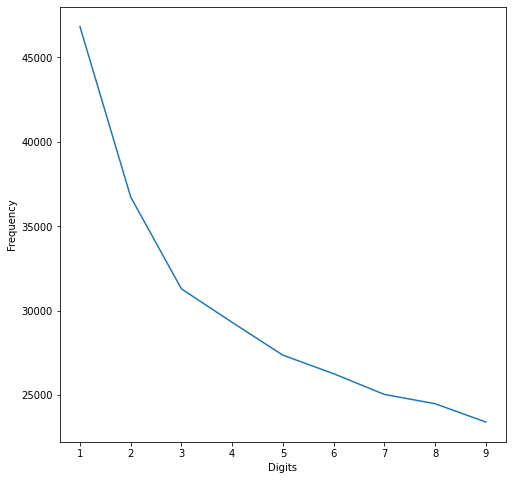

In [ ]:
digit_frequency = Benford_Law(population)
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,8))
plt.plot(range(1,10),digit_frequency)
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.show()

## Problem 3 (20%) - Dictionary test

>Create a dictionary called seaons with keys as the four seasons and values as the months of each season, i.e., 'Spring': [3,4,5] 

> Use the dictionary to determine which seaon a given month belongs to**



In [ ]:
Seasons = {'Spring':[3,4,5],'Summer':[6,7,8],'Fall':[9,10,11],'Winter':[12,1,2]}
from numpy import random
months = random.randint(1,13,50)
print('random months',months)

random months [ 3  4 12  8 12  2  7 12  8  1 10  5  9 12  3  2  1  3  2 11  1  3  4 12
  3  5 11  2  7  3  4 12  5  7  6  5  2  9  5  3  3  7 12  5 12  1  8  4
 12  1]


In [ ]:
for m in months:
    list_of_seasons = [sea
                for sea, mon in Seasons.items()
                if m in mon]
    if list_of_seasons:
        print(f' {m} ---> {list_of_seasons} season')


 3 ---> ['Spring'] season
 4 ---> ['Spring'] season
 12 ---> ['Winter'] season
 8 ---> ['Summer'] season
 12 ---> ['Winter'] season
 2 ---> ['Winter'] season
 7 ---> ['Summer'] season
 12 ---> ['Winter'] season
 8 ---> ['Summer'] season
 1 ---> ['Winter'] season
 10 ---> ['Fall'] season
 5 ---> ['Spring'] season
 9 ---> ['Fall'] season
 12 ---> ['Winter'] season
 3 ---> ['Spring'] season
 2 ---> ['Winter'] season
 1 ---> ['Winter'] season
 3 ---> ['Spring'] season
 2 ---> ['Winter'] season
 11 ---> ['Fall'] season
 1 ---> ['Winter'] season
 3 ---> ['Spring'] season
 4 ---> ['Spring'] season
 12 ---> ['Winter'] season
 3 ---> ['Spring'] season
 5 ---> ['Spring'] season
 11 ---> ['Fall'] season
 2 ---> ['Winter'] season
 7 ---> ['Summer'] season
 3 ---> ['Spring'] season
 4 ---> ['Spring'] season
 12 ---> ['Winter'] season
 5 ---> ['Spring'] season
 7 ---> ['Summer'] season
 6 ---> ['Summer'] season
 5 ---> ['Spring'] season
 2 ---> ['Winter'] season
 9 ---> ['Fall'] season
 5 ---> ['Spr

## Problem 4 (20%) - Numpy array manipulation
The attached "air.mon.mean.nc" file contains the monthly mean surface air temperature of the globe from 1948/01 -  2021/12.
Use this air temperature dataset to do the following exercises:  
1.	reshape the air temperature into a 4-dimentional array: air_month[nyear, 12, nlats, nlons], where nyear=74; nlats=73, nlons=144 
2.	 use the new air_month array to derive and plot the annual mean global mean temperature over the last 74 years
3.	derive and plot the 74-year annual cycle of the Arctic region with latitude larger than 60 degree and antatctic region with lartitude <-60 degree as a function of month (e.g., 1, 2, 3, ..., 12)
4.	derive and plot the summer months (June, July, August) temperature of United States over the last 74 years


A function "read_air_temp"is given to you to read the data

In [ ]:
def read_air_temp():
  # first let's check the air temperature dats has been downloaded yet?
  import os
  file_downloaded = os.path.isfile('surface_air_temp.nc')
  # if not, let's download it from NCEP website
  if ~file_downloaded:
    import urllib.request as urldownload
    air_temp_file_url='ftp://ftp2.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.sig995.mon.mean.nc'
    urldownload.urlretrieve(air_temp_file_url, 'surface_air_temp.nc')
  # after download, read in the data
  nc_fid = netCDF4.Dataset('surface_air_temp.nc', 'r')
  lats = nc_fid.variables['lat'][:]  # Latitude points
  lons = nc_fid.variables['lon'][:]  # Longitude points
  time = nc_fid.variables['time'][:] [:-8]#  Time steps, hours after 1800-01-01 00:00:0.0 which is equivalent of months since 1948-01 to 2021-12
  air = nc_fid.variables['air'][:]    # shape is time, lat, lon as shown above
  air = air[:-8:,:,:]
  nc_fid.close()
  return (lats, lons, time, air)

 The air temperature in four dimension is: (74, 12, 73, 144) 


Text(0.5, 1.0, 'Annual Variations of Temperature in the Summer for 73 years')

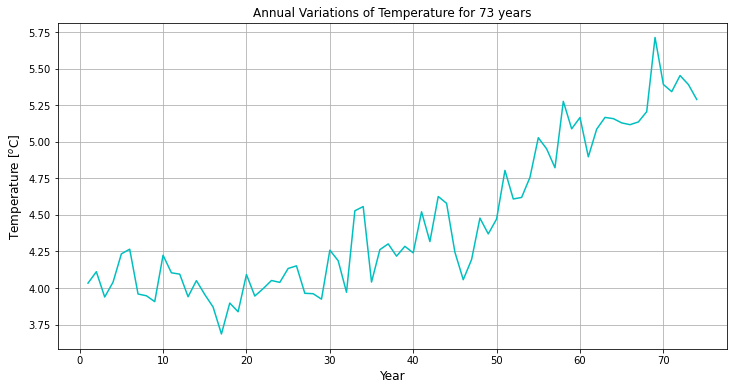

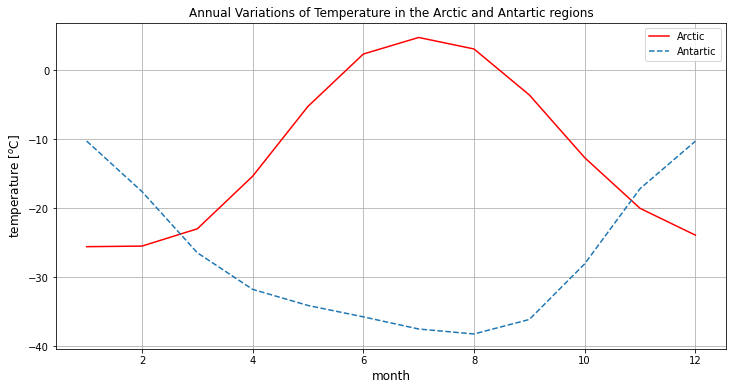

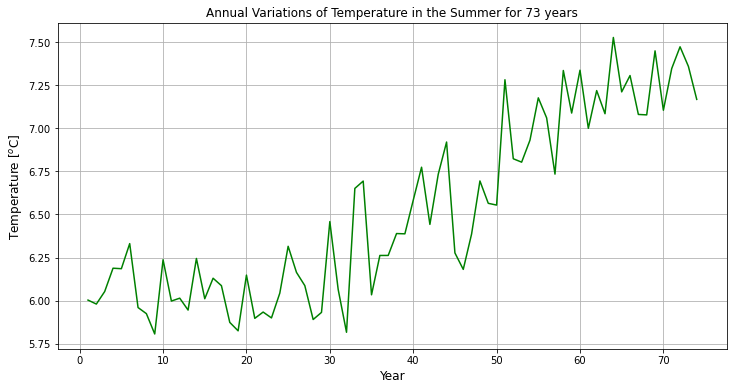

In [ ]:
lats, lons, time, air = read_air_temp()
# Question 1
air_year=air.reshape(74,12,73,144)
print(f' The air temperature in four dimension is: {air_year.shape} ')

# Question 2: Annual mean global mean temperature over the last 73 years
T_annual = air_year.mean(axis=(1,2,3))
fig,ax=plt.subplots(figsize=[12,6])
year = np.arange(1,75)
ax.plot(year,T_annual,c='c')
ax.set_xlabel('Year',fontsize='large')
ax.set_ylabel('Temperature [$^o$C]',fontsize='large')
ax.grid(True)
ax.set_title('Annual Variations of Temperature for 73 years')

# Question 3
T_arctic = air_year[:,:,lats>60.0,:].mean(axis=(0,2,3))
T_antartic = air_year[:,:,lats<-60.0,:].mean(axis=(0,2,3))
fig,ax=plt.subplots(figsize=[12,6])
month = np.arange(1,13)
ax.plot(month,T_arctic,label='Arctic', c= 'r')
ax.plot(month,T_antartic,ls='dashed',label='Antartic')
ax.set_xlabel('month',fontsize='large')
ax.set_ylabel('temperature [$^o$C]',fontsize='large')
ax.legend()
ax.grid(True)
ax.set_title('Annual Variations of Temperature in the Arctic and Antartic regions')

# Question 4: Derive and plot the summer months (June, July, August) temperature of United States over the last 73 years
T_summer = air_year[:,5:8,:,:].mean(axis=(1,2,3))
fig,ax=plt.subplots(figsize=[12,6])
year = np.arange(1,75)
ax.plot(year,T_summer,c='g')
ax.set_xlabel('Year',fontsize='large')
ax.set_ylabel('Temperature [$^o$C]',fontsize='large')
ax.grid(True)
ax.set_title('Annual Variations of Temperature in the Summer for 73 years')

In [ ]:
print(lats.shape,lons.shape, time.shape, air.shape)

(73,) (144,) (888,) (888, 73, 144)


## Problem 5 (20%) - Write a fucntion to compute blackboard radiation</a>

Planck's law describes the spectral density of electromagnetic radiation emitted by a black body in thermal equilibrium at a given temperature T, when there is no net flow of matter or energy between the body and its environment
https://en.wikipedia.org/wiki/Planck%27s_law

**Note** that Planck's law can be encountered in several forms depending on the conventions and preferences of different scientific fields. 

**Write the following functions to compute the blackboard radiation based on Planck's law** <br>
1) Write a Planck function (Planck_wl) that takes two variables as inputs: 1) temperature (unit:Kelvin) of the blackbody and 2) *wavelength* (unit:micrometer) of the radiation; the output is the intensity of the radiation at the surface of the blackbody (unit:W/m^2/micrometer/sr)  <br>

2) Write a Planck function ( (Planck_wn)) that takes two variables as inputs: 1) temperature (unit:Kelvin) of the blackbody and 2) *wavenumber* (unit:inverse centimeter) of the radiation (unit:W/m^2/wavenumber/sr)   <br>

3) combine the two codes into a single code called Planck and use a variable called wl_or_wn to control whether to call Planck_wl or Planck_wn based on the input   <br>

4) use your code to compute the radiations by two blackbodies with surface temperatures at 5800 Kelvin (e.g., the sun) and 300 Kelvin (i.e., earth), respectively, at two wavelengths, 0.5 micrometer and 10 micrometer, respectively.

In [ ]:
from sympy import symbols, exp, evalf

In [ ]:
def Planck_wl(t, w):
    # Blackbody radiation as a function of the wavelength
    h, c, kb, wl, T = symbols('h c kb wl T')
    t = t
    w = w
    expr = (2*h*(10**24)*c**2/((wl)**5))*(exp((h*c*(10**6))/((wl*(1))*kb*T)) - 1)**-1
    expr2 = expr.subs(h, 6.62606957e-34).subs(c, 299792458).subs(kb, 1.3806488e-23).subs(wl, w).subs(T, t)
    radiation_intensity = print(f'The intensity of the radiation at the surface of the blackbody is {expr2} W/m\u00b2/sr/um')
    return radiation_intensity

In [ ]:
def Planck_wn(temp, w_nu):
    # Blackbody radiation as a function of the wavenumber
    h, c, kb, wn, T = symbols('h c kb wn T')
    t = temp
    wn = w_nu
    expr_wn = 2*h*c**2*(wn**3)*(10**6)*(exp((h*c*wn)/(kb*T)) - 1)**-1
    #expr_wn2 = expr_wn.subs(h, 6.626e-34).subs(c, 3e8).subs(kb, 1.3806e-23).subs(wn, w).subs(T, t)
    expr_wn2 = expr_wn.subs(h, 6.62606957e-34).subs(c, 299792458).subs(kb, 1.3806488e-23).subs(wn, w_nu).subs(T, t)
    radiation_intensity2 = print(f'The intensity of the radiation at the surface of the blackbody is {expr_wn2} W/m\u00b2/sr/cm-1')
    return radiation_intensity2

In [ ]:
def Planck():
    method = input('For your Black body surface intensity calculation, if you want wavlength type wl or wn if you want wavenumber')
    if method == "wl":
        t = float(input('Tell me your value of the temperature in Kelvin and press enter = '))
        w = float(input('Tell me your value of the wavelength in micrometer and press enter = '))
        radiation = Planck_wl(t, w)
    else: 
        method == "wn"
        temp = float(input('Tell me your value of the temperature in Kelvin and press enter = '))
        wn = float(input('Tell me your value of the wavenumber in micrometer and press enter = '))
        radiation = Planck_wn(temp, wn)
    return radiation

In [ ]:
Planck()

For your Black body surface intensity calculation, if you want wavlength type wl or wn if you want wavenumberwn
Tell me your value of the temperature in Kelvin and press enter = 300
Tell me your value of the wavenumber in micrometer and press enter = 10
The intensity of the radiation at the surface of the blackbody is 0.000248285311048828 W/m²/sr/cm-1


In [ ]:
Planck()

For your Black body surface intensity calculation, if you want wavlength type wl or wn if you want wavenumberwl
Tell me your value of the temperature in Kelvin and press enter = 5800
Tell me your value of the wavelength in micrometer and press enter = 0.5
The intensity of the radiation at the surface of the blackbody is 26882189.5732668 W/m²/sr/um


##  - Build your own library


Put your Planck function codes into a directory called "PHYS640_lib" and add this directory to your "PYTHONPATH" and make sure that you can import these functions whenever you want


In [ ]:
import Planck_wl,Planck_wn,Planck